# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---


🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv(r"C:\Users\limon.DESKTOP-D4OD6GD\OneDrive\Desktop\Навчання\python\yulu_bike_sharing_dataset.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

In [3]:
def map_indian_season(month):
    if month in [12, 1, 2]:
        return 1   # Winter
    elif month in [3, 4, 5]:
        return 2   # Summer
    elif month in [6, 7, 8, 9]:
        return 3   # Monsoon
    else:  # 10, 11
        return 4   # Post-monsoon

df['weather_season_india'] = df['month'].apply(map_indian_season)

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [ ]:
monthly_counts = df['count'].resample('M').sum()


C:\Users\limon.DESKTOP-D4OD6GD\AppData\Local\Temp\ipykernel_26800\3369380610.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df['count'].resample('M').sum()


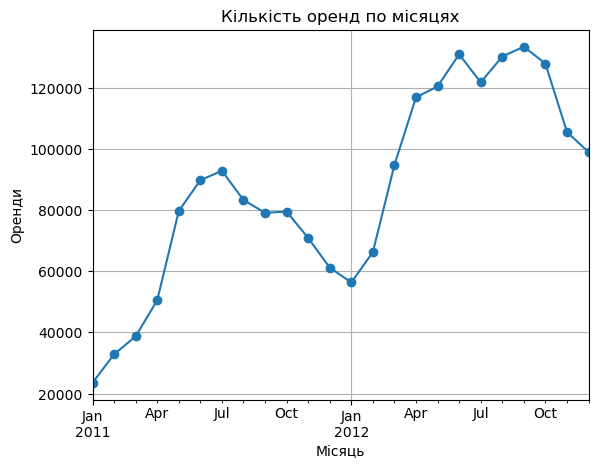

In [9]:
monthly_counts.plot(marker='o')
plt.title('Кількість оренд по місяцях')
plt.xlabel('Місяць')
plt.ylabel('Оренди')
plt.grid(True)
plt.show()

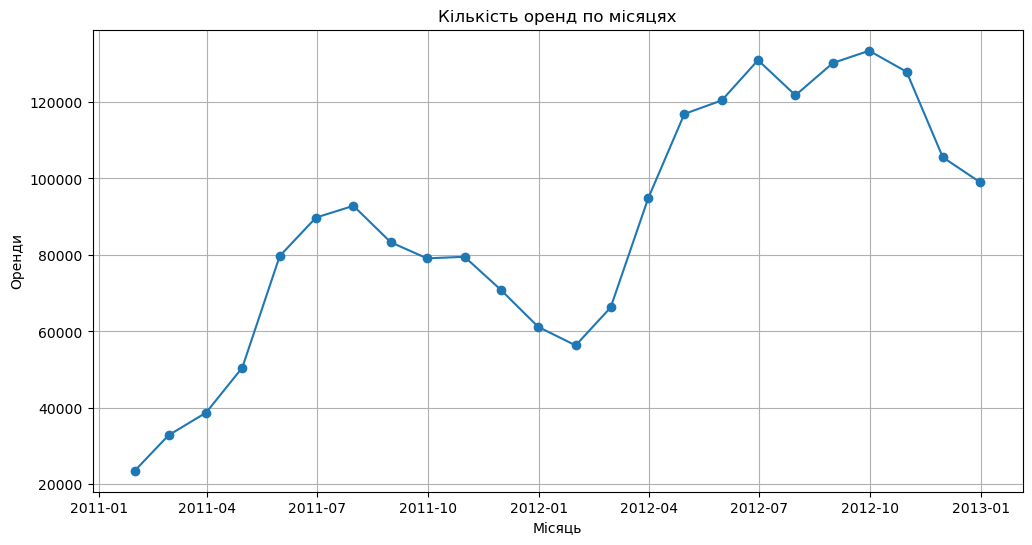

In [12]:
plt.figure(figsize=(12,6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
plt.title('Кількість оренд по місяцях')
plt.xlabel('Місяць')
plt.ylabel('Оренди')
plt.grid(True)
plt.show()

Подобається більше другий графік, він біль інформативний, кращий grid.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [13]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

In [15]:
import numpy as np

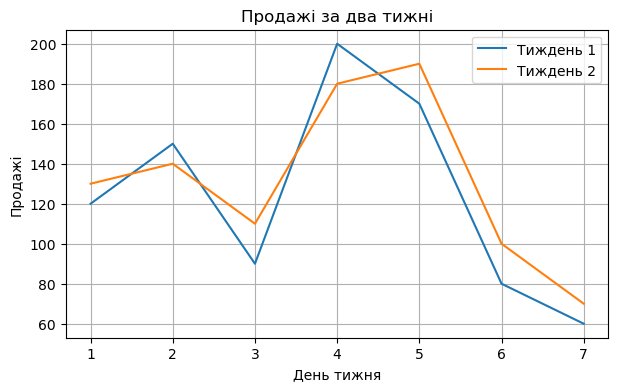

In [ ]:
plt.figure(figsize=(7,4))

plt.plot(days, week1, label="Тиждень 1")
plt.plot(days, week2, label="Тиждень 2")

plt.title("Продажі за два тижні")
plt.xlabel("День тижня")
plt.ylabel("Продажі")

plt.legend()
plt.grid(True)
plt.show()

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за кварталами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

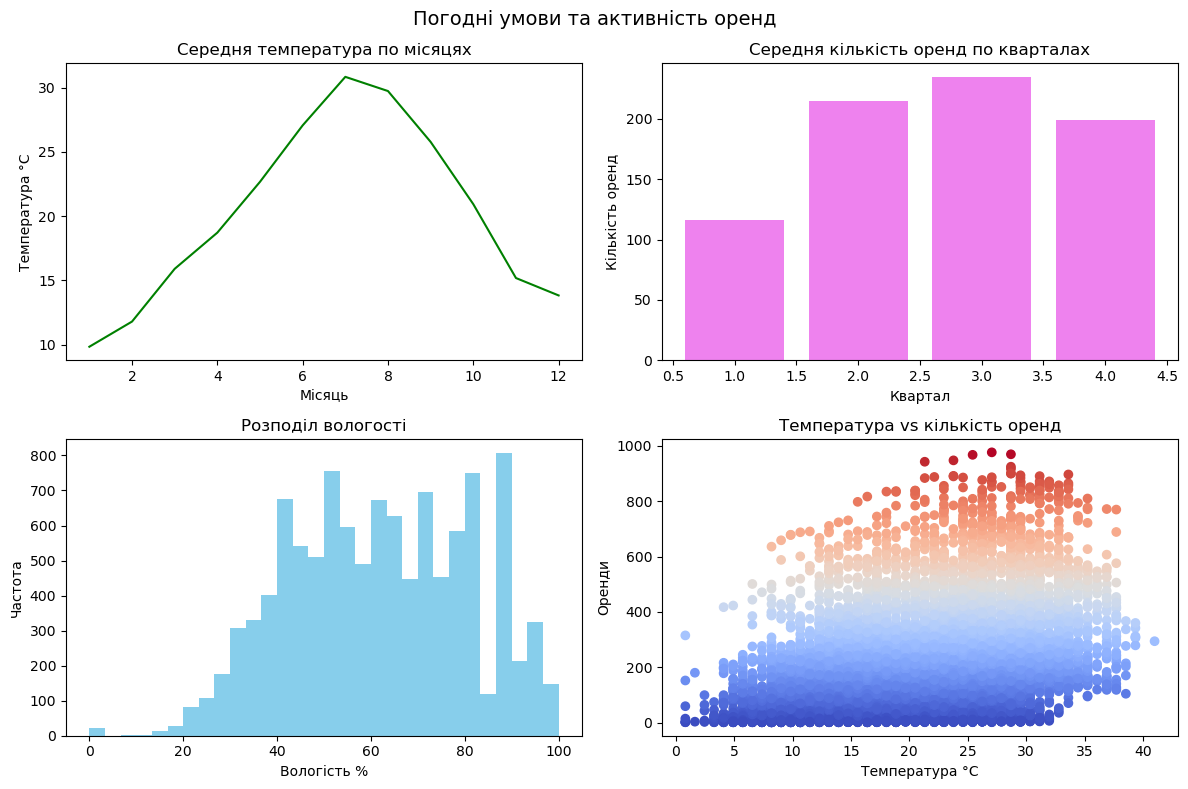

In [53]:


df.index = pd.to_datetime(df.index)

df["month"] = df.index.month
df["quarter"] = df.index.quarter

# 1. Середня температура по місяцях
months = df.groupby('month')['temp'].mean().index
avg_temp = df.groupby('month')['temp'].mean().values

# 2. Середня кількість оренд по кварталах
quarters = df.groupby('quarter')['count'].mean().index
avg_rentals = df.groupby('quarter')['count'].mean().values

# 3. Вологість (усі значення)
humidity = df['humidity'].values

# 4. Температура vs оренди
temperature_hours = df['temp'].values
rental_count = df['count'].values


plt.figure(figsize=(12, 8))

# Лінійний графік
plt.subplot(2, 2, 1)
plt.plot(months, avg_temp, color='green')
plt.title("Середня температура по місяцях")
plt.xlabel("Місяць")
plt.ylabel("Температура °C")

# Стовпчиковий графік
plt.subplot(2, 2, 2)
plt.bar(quarters, avg_rentals, color='violet')
plt.title("Середня кількість оренд по кварталах")
plt.xlabel("Квартал")
plt.ylabel("Кількість оренд")

# Гістограма
plt.subplot(2, 2, 3)
plt.hist(humidity, bins=30, color='skyblue')
plt.title("Розподіл вологості")
plt.xlabel("Вологість %")
plt.ylabel("Частота")

# Scatter plot
plt.subplot(2, 2, 4)
sc = plt.scatter(temperature_hours, rental_count, c=rental_count, cmap='coolwarm')
plt.title("Температура vs кількість оренд")
plt.xlabel("Температура °C")
plt.ylabel("Оренди")

plt.suptitle("Погодні умови та активність оренд", fontsize=14)
plt.tight_layout()
plt.show()

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

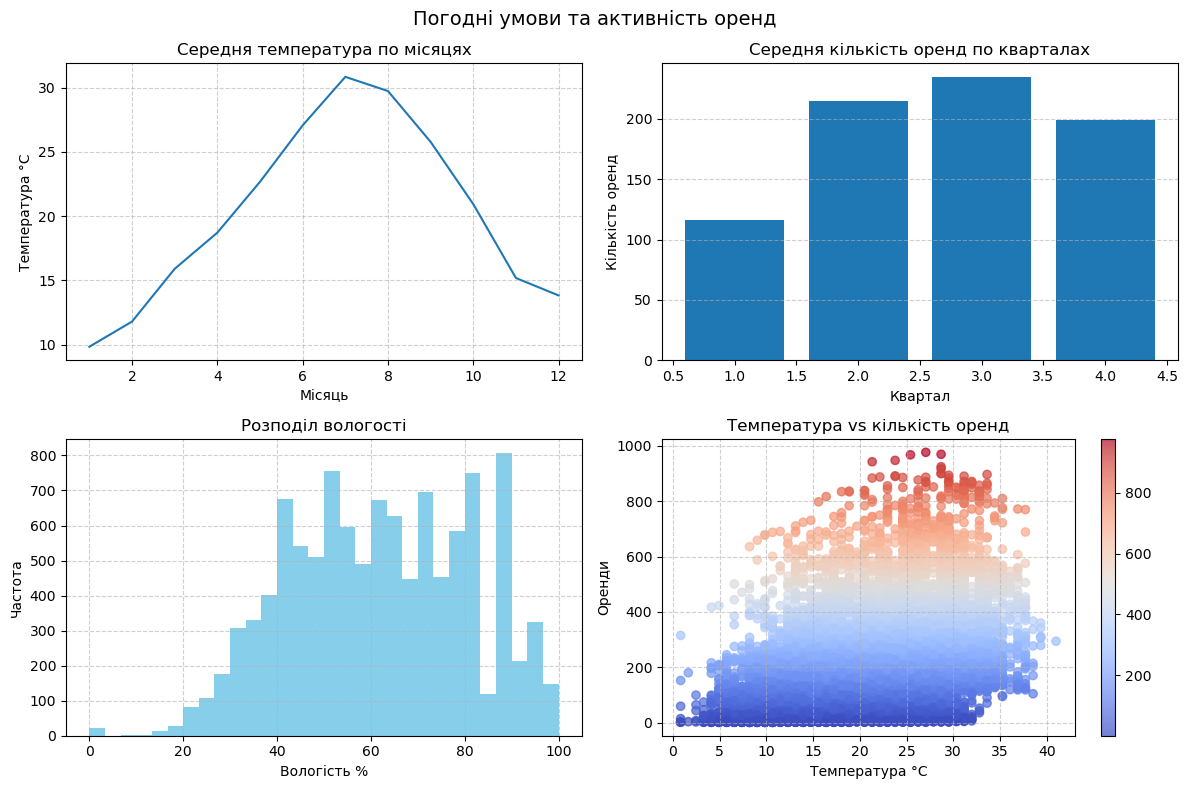

In [55]:

df.index = pd.to_datetime(df.index)

df["month"] = df.index.month
df["quarter"] = df.index.quarter

# Дані
months = df.groupby("month")["temp"].mean().index
avg_temp = df.groupby("month")["temp"].mean().values

quarters = df.groupby("quarter")["count"].mean().index
avg_rentals = df.groupby("quarter")["count"].mean().values

humidity = df["humidity"].values
temperature_hours = df["temp"].values
rental_count = df["count"].values


fig, ax = plt.subplots(2, 2, figsize=(12, 8))

#  Лінійний графік
ax[0, 0].plot(months, avg_temp)
ax[0, 0].set_title("Середня температура по місяцях")
ax[0, 0].set_xlabel("Місяць")
ax[0, 0].set_ylabel("Температура °C")
ax[0, 0].grid(True, linestyle="--", alpha=0.6)

#  Стовпчиковий графік
ax[0, 1].bar(quarters, avg_rentals)
ax[0, 1].set_title("Середня кількість оренд по кварталах")
ax[0, 1].set_xlabel("Квартал")
ax[0, 1].set_ylabel("Кількість оренд")
ax[0, 1].grid(axis="y", linestyle="--", alpha=0.6)

#  Гістограма
ax[1, 0].hist(humidity, bins=30, color="skyblue")
ax[1, 0].set_title("Розподіл вологості")
ax[1, 0].set_xlabel("Вологість %")
ax[1, 0].set_ylabel("Частота")
ax[1, 0].grid(True, linestyle="--", alpha=0.6)

#  Scatter plot + colorbar
sc = ax[1, 1].scatter(
    temperature_hours,
    rental_count,
    c=rental_count,
    cmap="coolwarm",
    alpha=0.7
)

ax[1, 1].set_title("Температура vs кількість оренд")
ax[1, 1].set_xlabel("Температура °C")
ax[1, 1].set_ylabel("Оренди")
ax[1, 1].grid(True, linestyle="--", alpha=0.6)

fig.colorbar(sc, ax=ax[1, 1])

# Заголовок дашборду
fig.suptitle("Погодні умови та активність оренд", fontsize=14)

plt.tight_layout()
plt.show()

plt.subplot() — це є старіший стиль в якому не дуже чітко можна аналізувати дані.
Він більше підходить для швидких візуалізацій.

plt.subplots() — сучасний, об’єктний стиль.
Чистіший код, більша можливість деталізувати графіки та легше його маштабувати.

## (Опціонально) Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

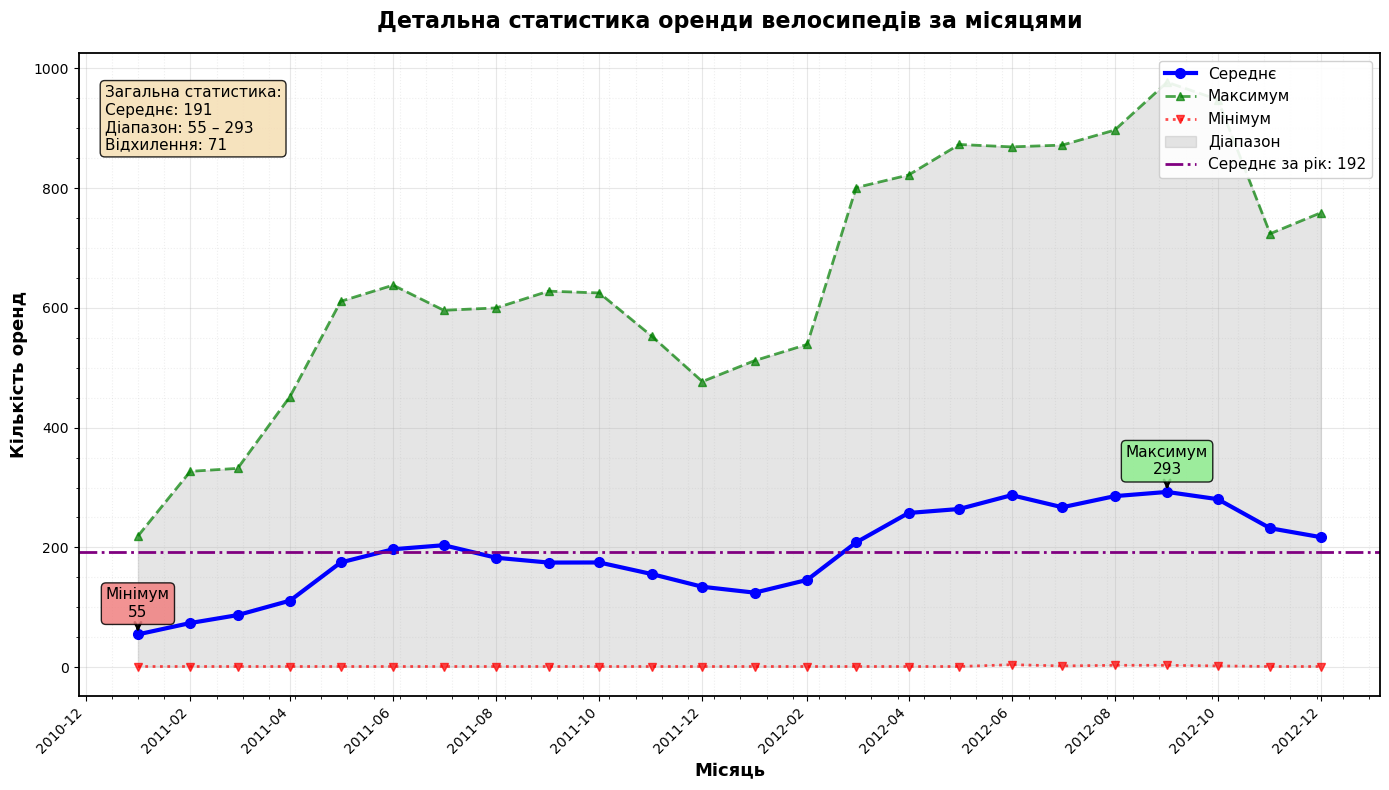

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


if isinstance(df.index, pd.DatetimeIndex):
    df = df.copy()
    df.index = pd.to_datetime(df.index)

elif "datetime" in df.columns:
    df = df.copy()
    df["datetime"] = pd.to_datetime(df["datetime"])
    df = df.set_index("datetime")
else:
    raise ValueError("Не знайдено datetime ні в індексі, ні в колонках.")

monthly_stats = df["count"].resample("MS").agg(["mean", "max", "min"]).dropna()


mean_series = monthly_stats["mean"]
mean_avg = mean_series.mean()
mean_max = mean_series.max()
mean_min = mean_series.min()
mean_range = mean_max - mean_min
mean_std = mean_series.std()
max_idx = mean_series.idxmax()
min_idx = mean_series.idxmin()

overall_mean = df["count"].mean()

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(monthly_stats.index, monthly_stats["mean"], "b-o", linewidth=3,
        label="Середнє", markersize=7)

ax.plot(monthly_stats.index, monthly_stats["max"], "g--^", linewidth=2,
        label="Максимум", markersize=6, alpha=0.7)

ax.plot(monthly_stats.index, monthly_stats["min"], "r:v", linewidth=2,
        label="Мінімум", markersize=6, alpha=0.7)

ax.fill_between(
    monthly_stats.index,
    monthly_stats["min"].values,
    monthly_stats["max"].values,
    alpha=0.2, color="gray", label="Діапазон"
)
ax.axhline(
    y=overall_mean,
    color="purple",
    linestyle="-.",
    linewidth=2,
    label=f"Середнє за рік: {overall_mean:.0f}"
)
ax.annotate(
    f"Максимум\n{mean_max:.0f}",
    xy=(max_idx, mean_max),
    xytext=(max_idx, mean_max + (mean_max * 0.10)),
    arrowprops=dict(arrowstyle="->", lw=2),
    fontsize=11,
    ha="center",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.85),
)
ax.annotate(
    f"Мінімум\n{mean_min:.0f}",
    xy=(min_idx, mean_min),
    xytext=(min_idx, mean_min + (mean_max * 0.10)),
    arrowprops=dict(arrowstyle="->", lw=2),
    fontsize=11,
    ha="center",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.85),
)
ax.set_xlabel("Місяць", fontsize=13, fontweight="bold")
ax.set_ylabel("Кількість оренд", fontsize=13, fontweight="bold")
ax.set_title("Детальна статистика оренди велосипедів за місяцями",
             fontsize=16, fontweight="bold", pad=18)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

ax.grid(True, which="major", linestyle="-", alpha=0.3)
ax.minorticks_on()
ax.grid(True, which="minor", linestyle=":", alpha=0.2)

textstr = (
    "Загальна статистика:\n"
    f"Середнє: {mean_avg:.0f}\n"
    f"Діапазон: {mean_min:.0f} – {mean_max:.0f}\n"
    f"Відхилення: {mean_std:.0f}"
)
ax.text(
    0.02, 0.95, textstr,
    transform=ax.transAxes,
    fontsize=11,
    va="top",
    bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.85)
)

ax.legend(loc="upper right", fontsize=11, frameon=True, fancybox=True, framealpha=0.9)

for spine in ax.spines.values():
    spine.set_linewidth(1.3)

plt.tight_layout()
plt.show()